# Integrador del Módulo 6

### Realizamos la Extracción, Transformación y Carga

Se realiza el ETL sobre el dataframe provisto por el cliente.

##### Importamos las librerías

In [113]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

##### Cargamos el Dataframe

In [114]:
df = pd.read_csv('Datasets/BBDD_Hospitalización.csv', encoding='ISO-8859-1')

##### Realizamos una descripción general de los datos

Se realiza una exploración de los datos, para conocer su estructura y tipos de datos, para obtener la información. 

In [115]:
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,"7,7",NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    object 
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

##### Visualizamos los valores nulos y procedemos a la imputación de 2 filas de datos, que contienen la mayoría de los datos Nan

In [117]:
df.isna().sum()

EDAD                                                                          2
DIABETES                                                                      2
HOSPITALIZACIÓN ULTIMO MES                                                    2
PSA                                                                           6
BIOPSIAS PREVIAS                                                              4
VOLUMEN PROSTATICO                                                            3
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       2
NUMERO DE MUESTRAS TOMADAS                                                    2
CUP                                                                           2
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             4
BIOPSIA                                                                       2
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     2
FIEBRE                                  

In [118]:
df = df.dropna(subset=["EDAD"])

In [119]:
df.isna().sum()

EDAD                                                                          0
DIABETES                                                                      0
HOSPITALIZACIÓN ULTIMO MES                                                    0
PSA                                                                           4
BIOPSIAS PREVIAS                                                              2
VOLUMEN PROSTATICO                                                            1
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       0
NUMERO DE MUESTRAS TOMADAS                                                    0
CUP                                                                           1
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             2
BIOPSIA                                                                       0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     0
FIEBRE                                  


##### Resumen estadístico del estado actual de las variables categóricas

In [93]:
df.describe()

,EDAD,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,460.000000,460.000000,460.000000,460.000000
mean,64.213043,12.923913,0.204348,0.017391
std,9.817853,3.970572,1.061088,0.218236
min,39.000000,4.000000,0.000000,0.000000
25%,59.000000,12.000000,0.000000,0.000000
50%,64.000000,12.000000,0.000000,0.000000
75%,69.000000,12.000000,0.000000,0.000000
max,151.000000,24.000000,12.000000,3.000000


In [94]:
df.describe(include=['category', 'object'])

,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
count,460,460,456,458,459,460,460,458,460,460,460,460,460,443,460,457
unique,2,2,146,2,2,5,3,4,11,6,2,2,4,3,5,2
top,NO,NO,6,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO
freq,408,456,24,410,326,365,456,442,231,434,423,454,452,435,453,433


### Transformamos los tipos de datos

In [ ]:
df['DIABETES'] = df['DIABETES'].astype('category')
df['HOSPITALIZACIÓN ULTIMO MES'] = df['HOSPITALIZACIÓN ULTIMO MES'].astype('category')
df['BIOPSIAS PREVIAS'] = df['BIOPSIAS PREVIAS'].astype('category')
df['VOLUMEN PROSTATICO'] = df['VOLUMEN PROSTATICO'].astype('category')
df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'] = df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].astype('category')
df['CUP'] = df['CUP'].astype('category')
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].astype('category')
df['BIOPSIA'] = df['BIOPSIA'].astype('category')
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].astype('category')
df['FIEBRE'] =df['FIEBRE'].astype('category')
df['ITU'] =df['ITU'].astype('category')
df['TIPO DE CULTIVO'] =df['TIPO DE CULTIVO'].astype('str')
df['AGENTE AISLADO'] =df['AGENTE AISLADO'].astype('str')
df['PATRON DE RESISTENCIA'] =df['PATRON DE RESISTENCIA'].astype('category')
df['HOSPITALIZACION'] =df['HOSPITALIZACION'].astype('category')

### Realizamos la estandarización y correciones por columna categórica

In [95]:
#Diabetes
#list(df['DIABETES'].unique())
#list(df['BIOPSIA'].unique())
#list(df['HOSPITALIZACIÓN ULTIMO MES'].unique())
#list(df['BIOPSIAS PREVIAS'].unique())
#list(df['ANTIBIOTICO UTILIZADO EN LA PROFILAXIS'].unique())
#Están correctas

list(df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].unique())

['NO', 'SI, EPOC', 'SI, ASMA', 'SI', nan]

In [96]:
# Crearemos una columna que ayude a segmentar la columna 'ENF. CRONICA PULMONAR OBSTRUCTIVA'
# 1. Duplicamos la columna
df['ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO']=df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].copy()
# 2. Corregimos la columna 'ENF. CRONICA PULMONAR OBSTRUCTIVA'
df['ENF. CRONICA PULMONAR OBSTRUCTIVA']=df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace({'SI, EPOC','SI, ASMA'},'SI')
# 3. Corregimos la columa 'ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO'
df['ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO']=df['ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO'].replace('SI, EPOC','EPOC')
df['ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO']=df['ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO'].replace('SI, ASMA','ASMA')


In [97]:
# Corregimos el nombre de la columna 
df = df.rename(columns={"ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS": "ANTIBIOTICO UTILIZADO EN LA PROFILAXIS"})

list(df['ANTIBIOTICO UTILIZADO EN LA PROFILAXIS'].unique())

# Corregimos los valores duplicados
df['ANTIBIOTICO UTILIZADO EN LA PROFILAXIS'] = df['ANTIBIOTICO UTILIZADO EN LA PROFILAXIS'].replace('FLUOROQUINOLONA_AMINOGLICÓSIDO', 'FLUOROQUINOLONA_AMINOGLICOSIDO')


In [98]:
# Corregiremos la columna, recortando los espacios a los costados
df['BIOPSIA']=df['BIOPSIA'].str.strip()

In [99]:
# Campo "NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA"
list(df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].unique())

['1', '2', '3', '5', '9', 'NO', nan]

In [100]:
# Campo "TIPO DE CULTIVO"
list(df['TIPO DE CULTIVO'].unique())

['NO', 'HEMOCULTIVO', 'UROCULTIVO', 'HEMOCULTIVO Y UROCULTIVO', nan]

In [101]:
# Campo "AGENTE AISLADO"
df['AGENTE AISLADO']=df['AGENTE AISLADO'].replace('nan',)

C:\Users\Cebol\AppData\Local\Temp\ipykernel_18444\1405477460.py:2: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df['AGENTE AISLADO']=df['AGENTE AISLADO'].replace('nan',)


In [102]:
list(df['AGENTE AISLADO'].unique())

['NO', 'E.COLI', 'PSEUDOMONAS AERUGINOSA', nan]

In [103]:
# Campo "PATRON DE RESISTENCIA"
list(df['PATRON DE RESISTENCIA'].unique())

['NO',
 ' AMPI R, CIPRO R, GENTA R, SULFA M R',
 'RESISTENTE A AMPI, CIPRO Y GENTA',
 'RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA',
 'MULTI SENSIBLE',
 nan]

##### Procedemos a la visualización de los datos

+ Histograma de variables numéricas

Text(0.5, 1.0, 'Histograma de las Edades')

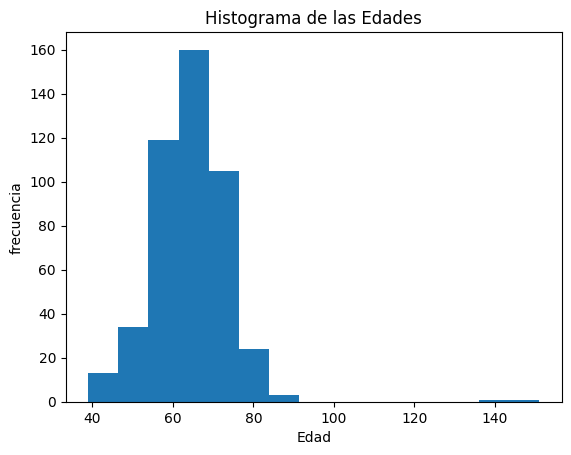

In [104]:
# Crea un histograma de la variable EDAD
plt.hist(df["EDAD"],bins=15)
plt.xlabel("Edad")
plt.ylabel("frecuencia")
plt.title("Histograma de las Edades")

Text(0.5, 1.0, 'Histograma de la Cantidad de Muestras Tomadas')

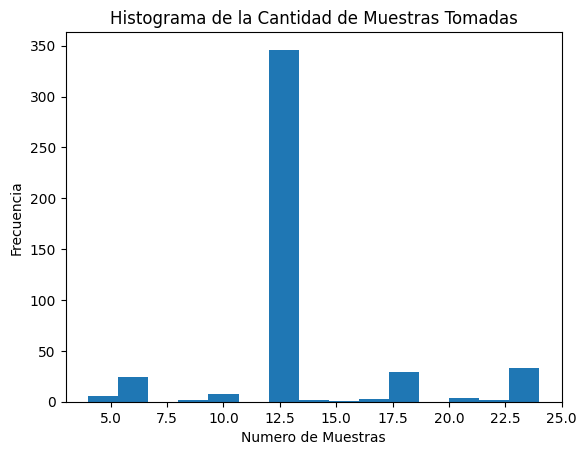

In [105]:
# Crea un histograma de la variable NUMERO DE MUESTRAS TOMADAS
plt.hist(df["NUMERO DE MUESTRAS TOMADAS"],bins=15)
plt.xlabel("Numero de Muestras")
plt.ylabel("Frecuencia")
plt.title("Histograma de la Cantidad de Muestras Tomadas")

Text(0.5, 1.0, 'Histograma de la Cantidad días Hospitalizado MQ')

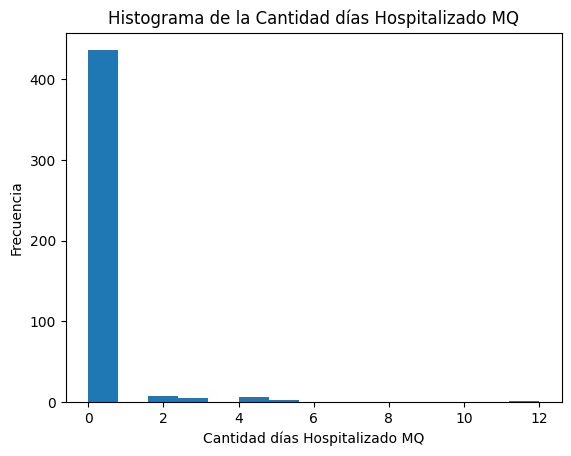

In [106]:
# Crea un histograma de la variable DIAS HOSPITALIZADOS MQ
plt.hist(df["DIAS HOSPITALIZACION MQ"],bins=15)
plt.xlabel("Cantidad días Hospitalizado MQ")
plt.ylabel("Frecuencia")
plt.title("Histograma de la Cantidad días Hospitalizado MQ")

Text(0.5, 1.0, 'Histograma de la Cantidad días Hospitalizado UPC')

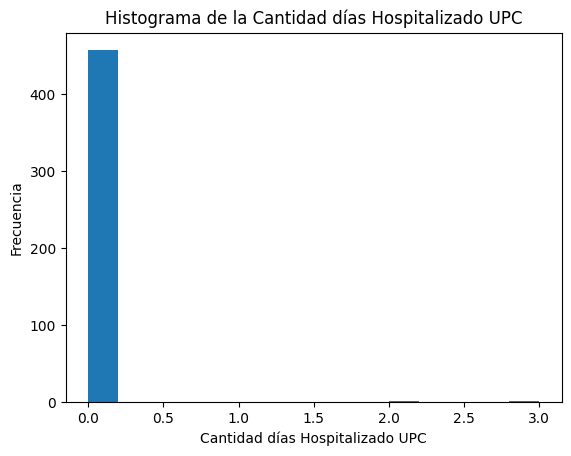

In [107]:
# # Crea un histograma de la variable DIAS HOSPITALIZADOS UPC
plt.hist(df["DIAS HOSPITALIZACIÓN UPC"],bins=15)
plt.xlabel("Cantidad días Hospitalizado UPC")
plt.ylabel("Frecuencia")
plt.title("Histograma de la Cantidad días Hospitalizado UPC")

+ Boxplot de variables numéricas

<Axes: >

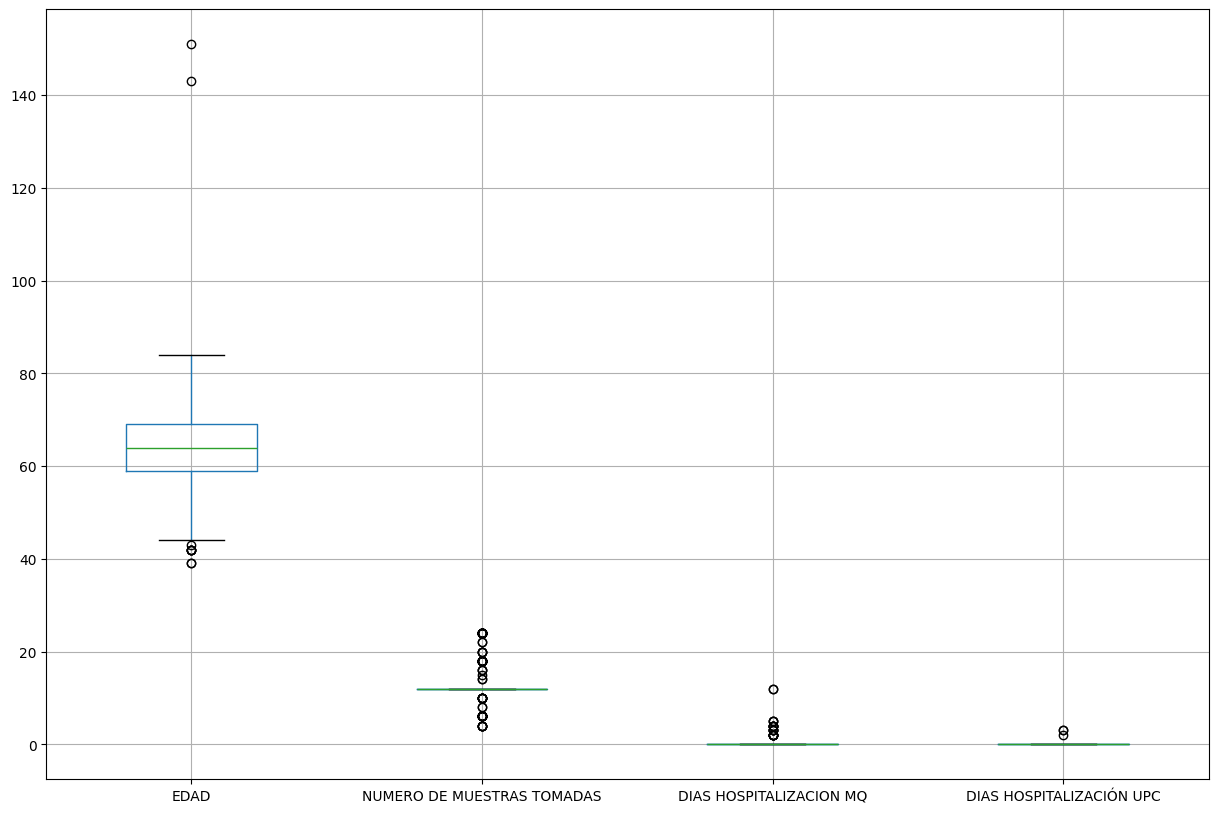

In [108]:
df.boxplot(figsize=(15, 10))


+ Distribución de variables categóricas

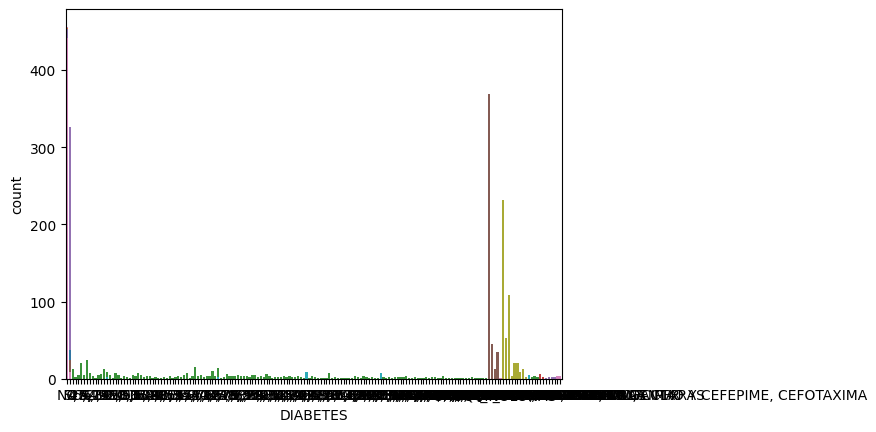

In [109]:
for col in df.select_dtypes(include=['object', 'category']):
    sns.countplot(x=col, data=df)

##### Buscamos la cantidad de valores nulos

In [110]:
df.isnull().sum()

EDAD                                                                          2
DIABETES                                                                      2
HOSPITALIZACIÓN ULTIMO MES                                                    2
PSA                                                                           6
BIOPSIAS PREVIAS                                                              4
VOLUMEN PROSTATICO                                                            3
ANTIBIOTICO UTILIZADO EN LA PROFILAXIS                                        2
NUMERO DE MUESTRAS TOMADAS                                                    2
CUP                                                                           2
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             4
BIOPSIA                                                                       2
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     2
FIEBRE                                  